In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, r2_score
)
import os
from pathlib import Path

In [60]:
# === Configuración ===
sns.set(style="whitegrid")
metrics_dir = Path(".")
models = ["logistic_regression", "random_forest", "gradient_boosting"]
feature_names = ["score_mean", "n_assessments", "total_weight", "total_clicks", "studied_credits", "num_of_prev_attempts"]

In [61]:
# === CARGAR MÉTRICAS DE CADA MODELO ===
metrics_dfs = []
for model in models:
    path = metrics_dir / f"{model}_metrics.csv"
    if not path.exists():
        continue
    df = pd.read_csv(path)
    df["Model"] = model.replace("_", " ").title()
    metrics_dfs.append(df)
    
if not metrics_dfs:
    raise ValueError("No se encontraron archivos de métricas en la carpeta outputs/")    

In [62]:
metrics_df = pd.concat(metrics_dfs, ignore_index=True)

In [63]:
# === Mostrar tabla comparativa ===
display(metrics_df[["Model", "Precision", "Recall", "F1_score", "Accuracy", "ROC_AUC", "R2", "MSE"]].sort_values("F1_score", ascending=False))

,Model,Precision,Recall,F1_score,Accuracy,ROC_AUC,R2,MSE
2,Gradient Boosting,0.714513,0.827343,0.766800,0.765933,0.769936,0.059157,0.234067
1,Random Forest,0.715683,0.741628,0.728425,0.742784,0.742708,-0.033893,0.257216
0,Logistic Regression,0.578173,0.458986,0.511731,0.592598,0.583888,-0.637572,0.407402


In [64]:
# === Gráfico de barras por métrica ===
metrics_to_plot = ["Precision", "Recall", "F1_score", "Accuracy", "ROC_AUC", "MSE"]

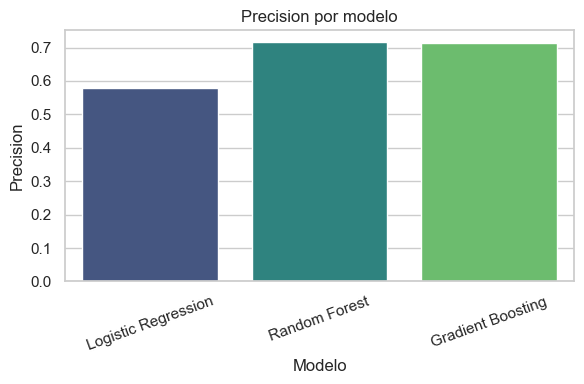

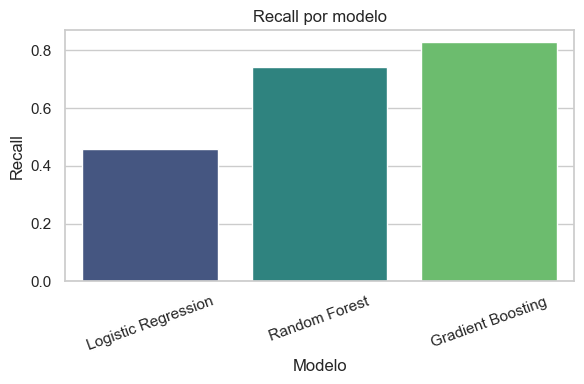

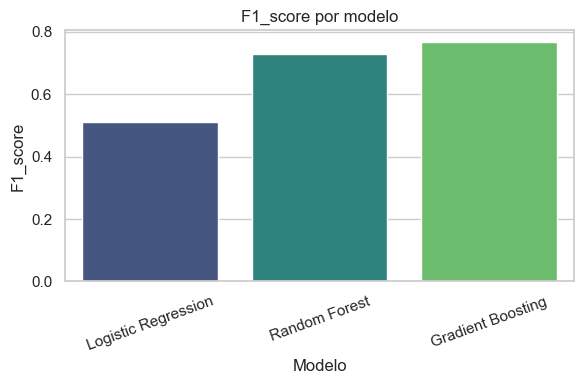

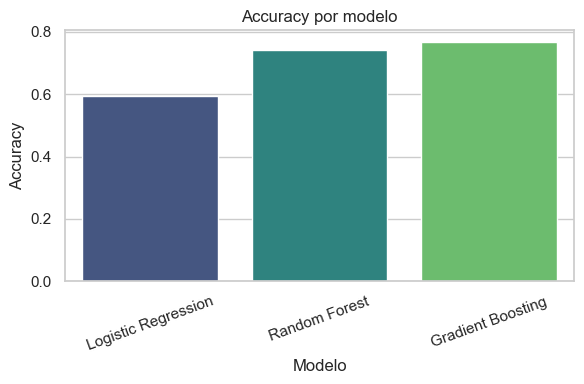

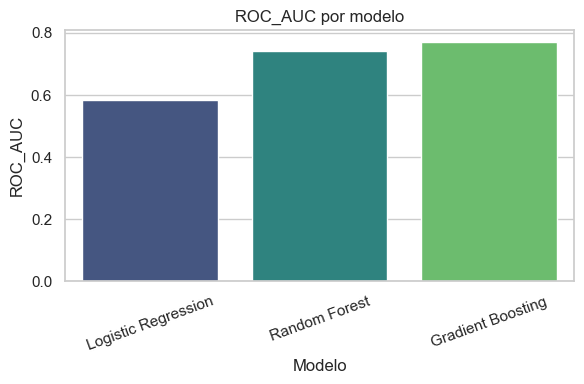

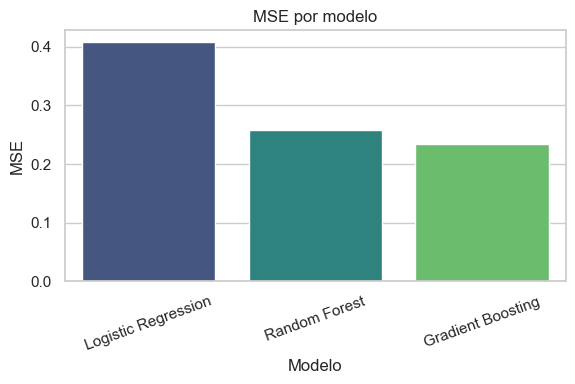

In [65]:
for metric in metrics_to_plot:
    plt.figure(figsize=(6, 4))
    sns.barplot(
        data=metrics_df,
        x="Model",
        y=metric,
        hue="Model",          # Añadido
        palette="viridis",
        legend=False          # Evita mostrar leyenda repetida
    )
    plt.title(f"{metric} por modelo")
    plt.ylabel(metric)
    plt.xlabel("Modelo")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

In [66]:
# === Mejor modelo según F1 y MSE ===
best_f1 = metrics_df.loc[metrics_df["F1_score"].idxmax()]
best_mse = metrics_df.loc[metrics_df["MSE"].idxmin()]

In [67]:
print("\nMejor modelo según F1_score:")
print(f"- Modelo: {best_f1['Model']}")
print(f"- F1_score: {best_f1['F1_score']:.3f}")


Mejor modelo según F1_score:
- Modelo: Gradient Boosting
- F1_score: 0.767


In [68]:
print("\nMejor modelo según menor MSE:")
print(f"- Modelo: {best_mse['Model']}")
print(f"- MSE: {best_mse['MSE']:.3f}")


Mejor modelo según menor MSE:
- Modelo: Gradient Boosting
- MSE: 0.234


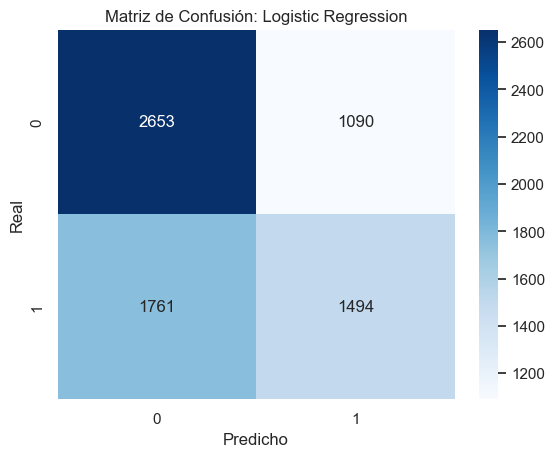

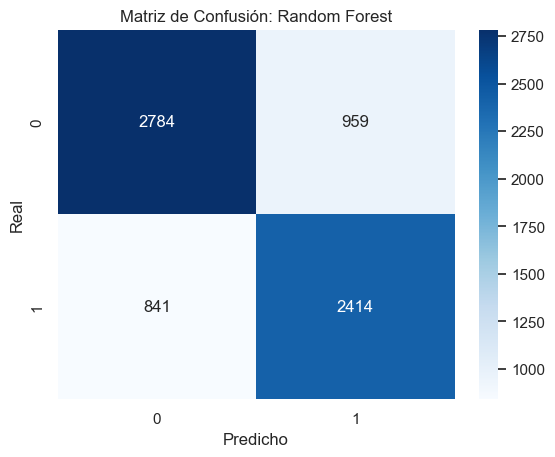

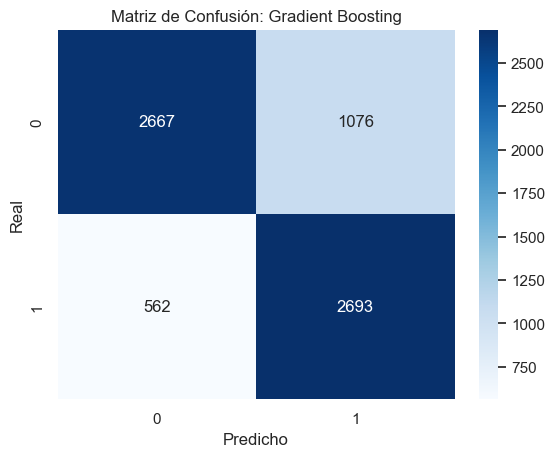

In [69]:
# === MATRIZ DE CONFUSIÓN ===
def plot_confusion(model_name):
    pred_path = metrics_dir / f"{model_name}_predictions.csv"
    if not pred_path.exists():
        print(f"No hay archivo de predicciones para: {model_name}")
        return

    df_pred = pd.read_csv(pred_path)
    cm = confusion_matrix(df_pred["y_test"], df_pred["y_pred"])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión: {model_name.replace('_', ' ').title()}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

# Dibujar todas las matrices
for model in models:
    plot_confusion(model)